# Application of various XAI techniques on the IRIS dataset

### Setup

In [1]:
!pip install numpy scikit-learn tqdm shap lime torch deeplift matplotlib seaborn

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [3]:
import numpy as np
from sklearn import datasets
cancer = datasets.load_breast_cancer()

We will train a SVM model on the breast cancer dataset and apply various XAI techniques to understand the model better.
Brest cancer dataset is a binary classification dataset with 30 features. It is a good dataset to understand the working of XAI techniques.

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(C=1, probability=True)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print("the accuracy is ", accuracy_score(y_test, clf.predict(X_test)))

the accuracy is  0.965034965034965


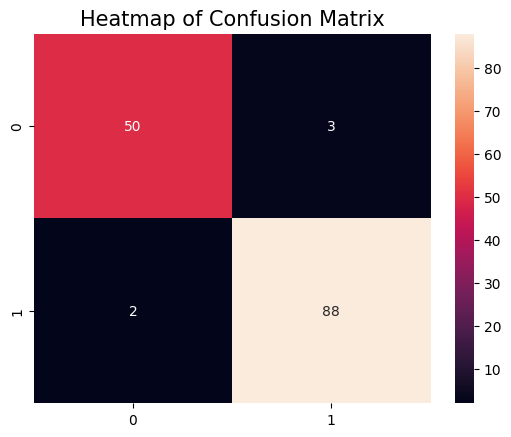

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, clf.predict(X_test))
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

### SHAP

In [6]:
import shap

# explain all the predictions in the test set
explainer_shap = shap.KernelExplainer(clf.predict, X_train, feature_names=cancer.feature_names)
shap_values = explainer_shap(X_train)



/Users/remigrz/Documents/GitHub/XAI_exploration/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using 426 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  4%|▍         | 17/426 [02:04<50:01,  7.34s/it]


KeyboardInterrupt: 

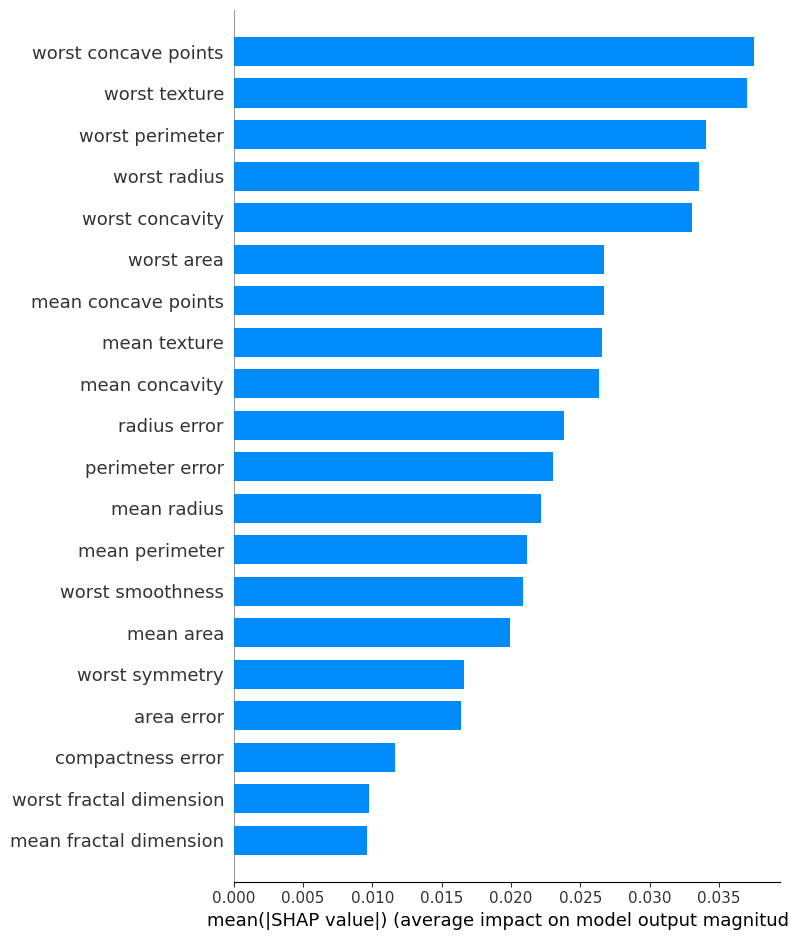

AssertionError: Feature and SHAP matrices must have the same number of rows!

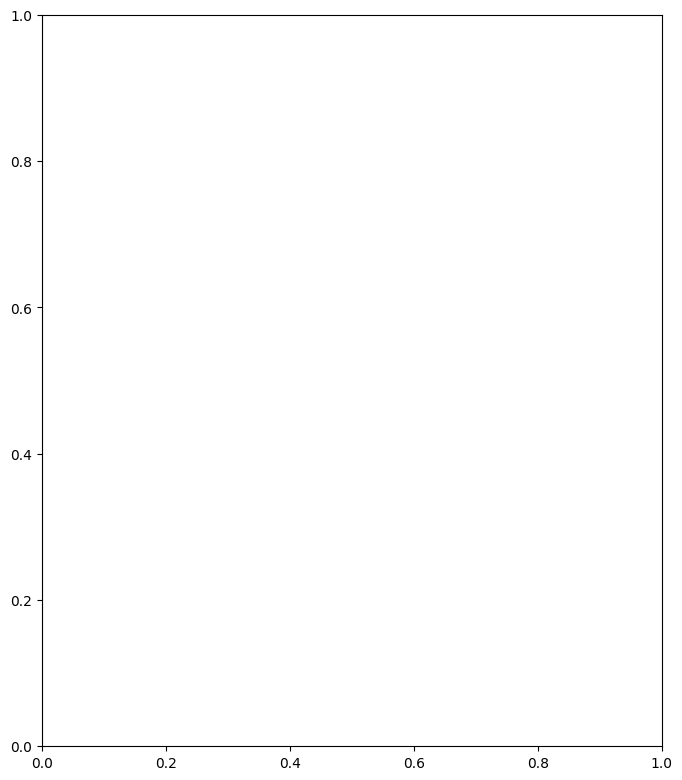

In [ ]:
# plot the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=cancer.feature_names, plot_type="bar", class_names=cancer.target_names)
shap.summary_plot(shap_values, X_test, feature_names=cancer.feature_names, class_names=cancer.target_names)

Worst texture is the most important feature for the classifier. According to the first plot.

We the second plot, we see that high worst texture leads to a classification of malignant cancer and low worst texture leads to a classification of beign cancer.

In [ ]:
# explain the first prediction
from shap import initjs
initjs()

shap.force_plot(shap_values)


For this prediction, the sepal lenght and petal length decrease the probability of the flower being of the class 'setosa'. The sepal width and petal width increase the probability of the flower being of the class 'setosa'.

In [ ]:
# Plot waterfall plot per class
from shap import Explanation

for i in range(2):
    shap.waterfall_plot(shap_values[i], max_display=10, show=False)
    plt.title('Cancer class: ' + cancer.target_names[i])
    plt.show()

AttributeError: 'LimeTabularExplainer' object has no attribute 'expected_value'

### LIME

In [ ]:
import lime

# explain the first prediction
from lime.lime_tabular import LimeTabularExplainer
explainer_lime = LimeTabularExplainer(X_train, feature_names=cancer.feature_names, class_names=cancer.target_names, discretize_continuous=True)
exp = explainer_lime.explain_instance(X_test, clf.predict_proba, num_features=4)


ValueError: could not broadcast input array from shape (143,30) into shape (143,)